<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

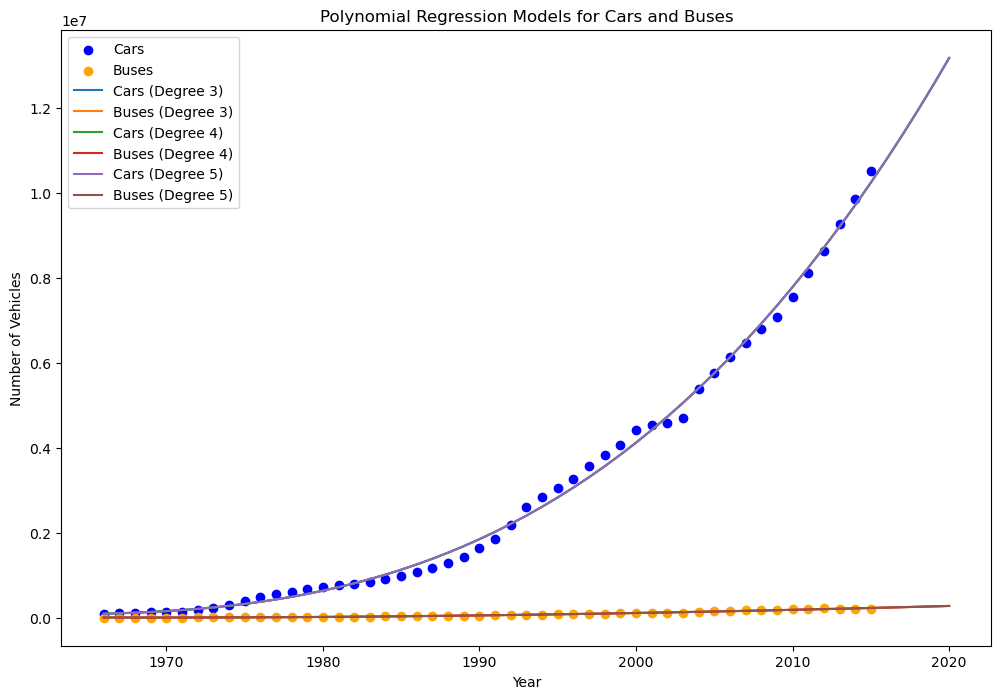

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Replace 'arac.csv' with the actual path to your CSV file
csv_file_path = 'arac.csv'

# Read the CSV file into a pandas DataFrame with the correct delimiter
df = pd.read_csv(csv_file_path, delimiter=';')

# Extract relevant columns
years = df['Year'].values.reshape(-1, 1)  # Years as input features
cars = df['Car'].values.reshape(-1, 1)   # Cars as target variable
buses = df['Bus'].values.reshape(-1, 1)  # Buses as target variable

# Degrees to try
degrees = [3, 4, 5]

# Plot the original data
plt.figure(figsize=(12, 8))
plt.scatter(years, cars, label='Cars', color='blue')
plt.scatter(years, buses, label='Buses', color='orange')

# Plot the fitted polynomial models for different degrees
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    years_poly = poly_features.fit_transform(years)

    # Fit polynomial regression for Cars
    model_cars = LinearRegression()
    model_cars.fit(years_poly, cars)

    # Fit polynomial regression for Buses
    model_buses = LinearRegression()
    model_buses.fit(years_poly, buses)

    # Predictions for plotting
    years_for_plot = np.arange(1966, 2021).reshape(-1, 1)
    years_for_plot_poly = poly_features.transform(years_for_plot)
    predicted_cars = model_cars.predict(years_for_plot_poly)
    predicted_buses = model_buses.predict(years_for_plot_poly)

    # Plot the fitted models
    plt.plot(years_for_plot, predicted_cars, label=f'Cars (Degree {degree})')
    plt.plot(years_for_plot, predicted_buses, label=f'Buses (Degree {degree})')

plt.title('Polynomial Regression Models for Cars and Buses')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()



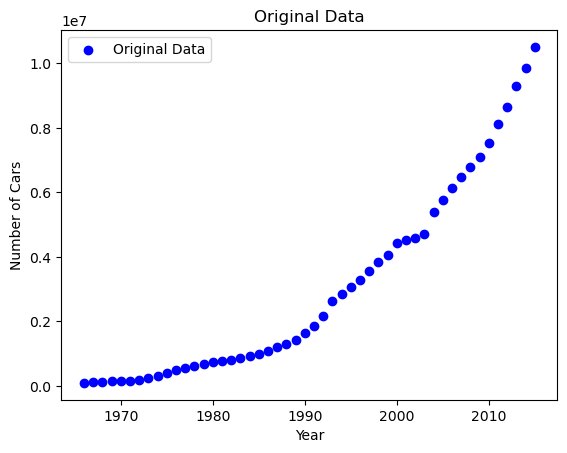

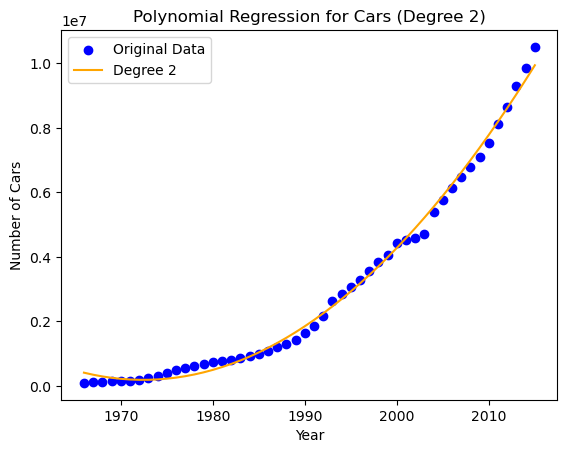

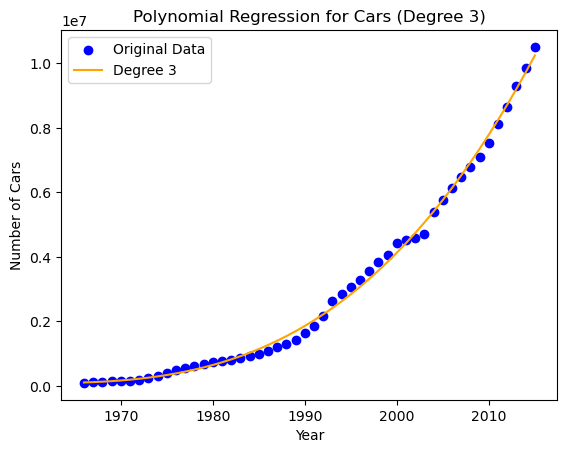

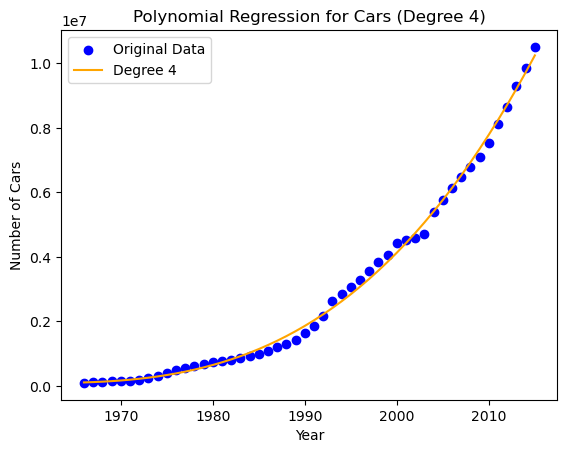

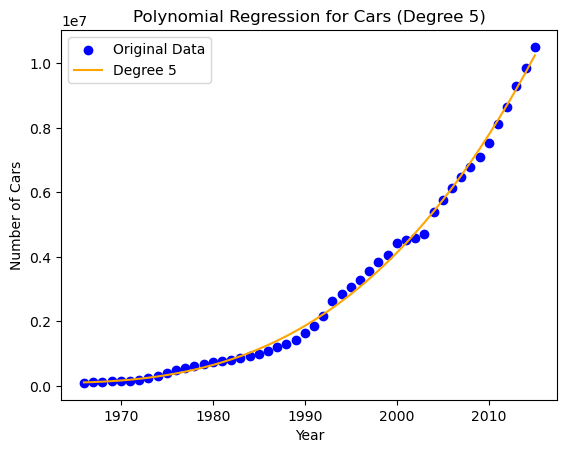

   Year  Predicted Buses
0  2016    252912.636636
1  2017    262782.220778
2  2018    272852.496772
3  2019    283123.464620
4  2020    293595.124320


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Replace 'arac.csv' with the actual path to your CSV file
csv_file_path = 'arac.csv'

# Read the CSV file into a pandas DataFrame with the correct delimiter
df = pd.read_csv(csv_file_path, delimiter=';')

# Extract relevant columns
years = df['Year'].values.reshape(-1, 1)  # Years as input features
cars = df['Car'].values.reshape(-1, 1)   # Cars as target variable
buses = df['Bus'].values.reshape(-1, 1)  # Buses as target variable

# Specify the degrees of the polynomial
degrees = [2, 3, 4, 5]

# Plot the original data
plt.scatter(years, cars, label='Original Data', color='blue')
plt.title('Original Data')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend()
plt.show()

# Fit and plot the model for each degree
for K in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=K)
    years_poly = poly_features.fit_transform(years)

    # Fit polynomial regression for Cars
    model_cars = LinearRegression()
    model_cars.fit(years_poly, cars)

    # Predict Cars for the years 1966-2020
    predicted_cars = model_cars.predict(years_poly)

    # Plot the model fit
    plt.scatter(years, cars, label='Original Data', color='blue')
    plt.plot(years, predicted_cars, label=f'Degree {K}', color='orange')
    plt.title(f'Polynomial Regression for Cars (Degree {K})')
    plt.xlabel('Year')
    plt.ylabel('Number of Cars')
    plt.legend()
    plt.show()

# Continue with the rest of the original code to predict and print Buses
# ...

# Display the predictions for Buses
predictions_df = pd.DataFrame({
    'Year': years_to_predict.flatten(),
    'Predicted Buses': predicted_buses.flatten()
})

print(predictions_df)




## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [29]:
import pandas as pd

def load_data(file_name):
    csv_file_path = 'image.csv'
    df = pd.read_csv(csv_file_path, header=None, delim_whitespace=True)
    
    # Assuming the column name is 0, use the correct column name in the following line
    df[[0, 1]] = df[0].str.split(',', expand=True).astype(float)

    # Extract the X and Y columns and convert to a NumPy array
    data_array = df[[0, 1]].values
    return data_array

load_data('image.csv')

array([[ 3.69959867,  3.89235252],
       [ 2.6413343 ,  2.97095728],
       [-1.66329434,  3.35560306],
       ...,
       [ 0.5785215 ,  0.34965446],
       [ 2.6710785 ,  2.30721969],
       [-1.04525337,  1.21114529]])

- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [32]:
import numpy as np

def kmeans(X, K):
    n, d = X.shape
    
    # Step 1: Initialize cluster centroids randomly from the data points
    M = X[np.random.choice(n, K, replace=False)]
    
    # Iterate until convergence (no fixed maximum iterations)
    while True:
        # Step 2: Assign data points to the nearest cluster centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - M, axis=2)
        U = np.zeros((n, K))
        U[np.arange(n), np.argmin(distances, axis=1)] = 1
        
        # Step 3: Update cluster centroids as the mean of the assigned data points
        new_M = np.dot(U.T, X) / np.sum(U, axis=0)[:, np.newaxis]
        
        # Check for convergence
        if np.allclose(M, new_M):
            break
        
        M = new_M  # Update centroids
        
    return M, U

# Example usage:
# Generate some random data for testing
#np.random.seed(42)
#data_points = np.random.rand(100, 2)

#print(data_points)


# Your original DataFrame
df = load_data('image.csv')

data_points = df
print(data_points)

# Set the number of clusters (K)
num_clusters = 3

# Run the kmeans algorithm
centroids, assignments = kmeans(data_points, num_clusters)

print("Cluster Centroids:")
print(centroids)
print("\nCluster Assignments:")
print(assignments)


[[ 3.69959867  3.89235252]
 [ 2.6413343   2.97095728]
 [-1.66329434  3.35560306]
 ...
 [ 0.5785215   0.34965446]
 [ 2.6710785   2.30721969]
 [-1.04525337  1.21114529]]
Cluster Centroids:
[[-0.07057305  0.02795606]
 [-2.13711914  4.12519435]
 [ 3.18586944  3.06155446]]

Cluster Assignments:
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

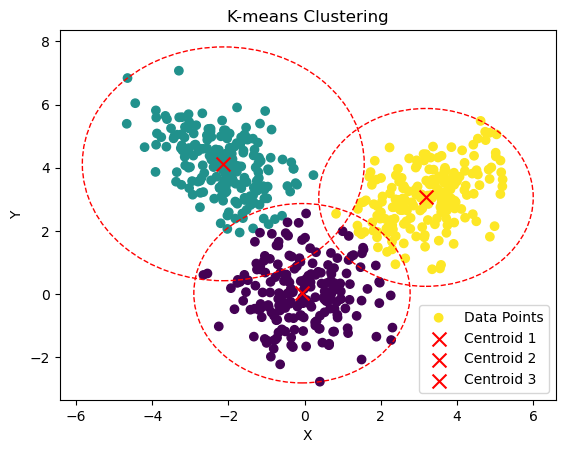

In [33]:
import matplotlib.pyplot as plt

def plot_clusters(X, M, U):
    K = M.shape[0]
    
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=U.argmax(axis=1), cmap='viridis', marker='o', label='Data Points')
    
    # Plot centroids with circles
    for k in range(K):
        plt.scatter(M[k, 0], M[k, 1], c='red', marker='x', s=100, label=f'Centroid {k+1}')
        circle = plt.Circle((M[k, 0], M[k, 1]), radius=np.max(np.linalg.norm(X[U[:, k] == 1] - M[k], axis=1)),
                            color='red', fill=False, linestyle='dashed', linewidth=1)
        plt.gca().add_patch(circle)

    # Label the axes and add a title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('K-means Clustering')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
# Use the centroids and assignments obtained from the kmeans function
plot_clusters(data_points, centroids, assignments)


**<font color="red"> Don't edit the code in the following cell!</font>**

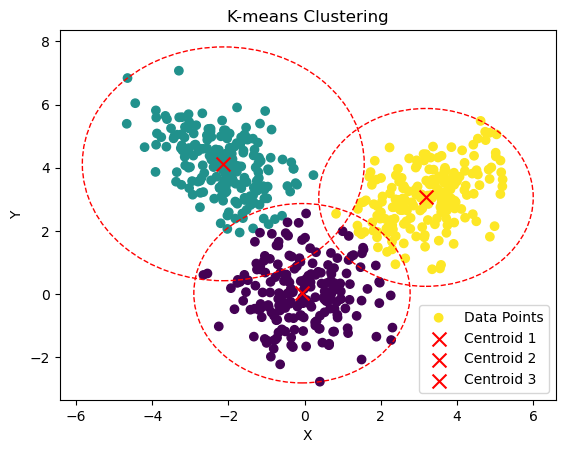

In [34]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image1.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

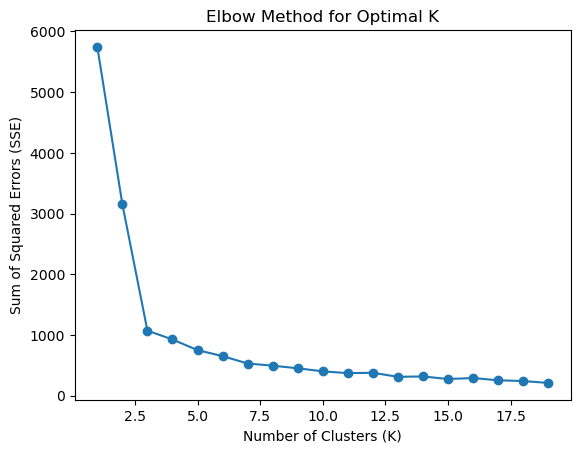

In [41]:
#def elbow_method(X, K_list):
#    pass
#    return S

# the rest of the code...

import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, K, max_iters=100):
    n, d = X.shape
    indices = np.random.choice(n, K, replace=False)
    M = X[indices, :]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis, :] - M, axis=2)
        U = np.argmin(distances, axis=1)
        M_new = np.array([np.mean(X[U == k, :], axis=0) for k in range(K)])

        if np.all(M == M_new):
            break

        M = M_new

    return M, U

def elbow_method(X, possible_K):
    SSE_values = []

    for K in possible_K:
        M, U = kmeans(X, K)
        SSE = 0

        for k in range(K):
            cluster_points = X[U == k]  # Corrected indexing
            centroid = M[k, :]
            SSE += np.sum((cluster_points - centroid) ** 2)

        SSE_values.append(SSE)

    return np.array(SSE_values)

# Example usage:
X = np.random.rand(100, 2)

df = load_data('image.csv')

X = df

possible_K = range(1, 20)

# Call the elbow_method function
SSE_values = elbow_method(X, possible_K)

# Plotting the elbow curve
plt.plot(possible_K, SSE_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()



# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [63]:
import pandas as pd

path = 'sentiment.csv'

df = pd.read_csv(path)

df.head(25)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [45]:
import pandas as pd

path = 'sentiment.csv'

df = pd.read_csv(path)

df.tail(10)

,PhraseId,SentenceId,Phrase,Sentiment
9990,9991,419,this a comedy or serious drama,2
9991,9992,419,a comedy or serious drama,2
9992,9993,419,a comedy or,2
9993,9994,419,a comedy,2
9994,9995,419,serious drama,2
9995,9996,420,plays like some corny television production fr...,1
9996,9997,420,plays like some corny television,1
9997,9998,420,like some corny television,2
9998,9999,420,some corny television,1
9999,10000,420,corny television,1


In [46]:
import pandas as pd

path = 'sentiment.csv'

df = pd.read_csv(path)

df.info

<bound method DataFrame.info of       PhraseId  SentenceId                                             Phrase  \
0            1           1  A series of escapades demonstrating the adage ...   
1            2           1  A series of escapades demonstrating the adage ...   
2            3           1                                           A series   
3            4           1                                                  A   
4            5           1                                             series   
...        ...         ...                                                ...   
9995      9996         420  plays like some corny television production fr...   
9996      9997         420                   plays like some corny television   
9997      9998         420                         like some corny television   
9998      9999         420                              some corny television   
9999     10000         420                                   corny television

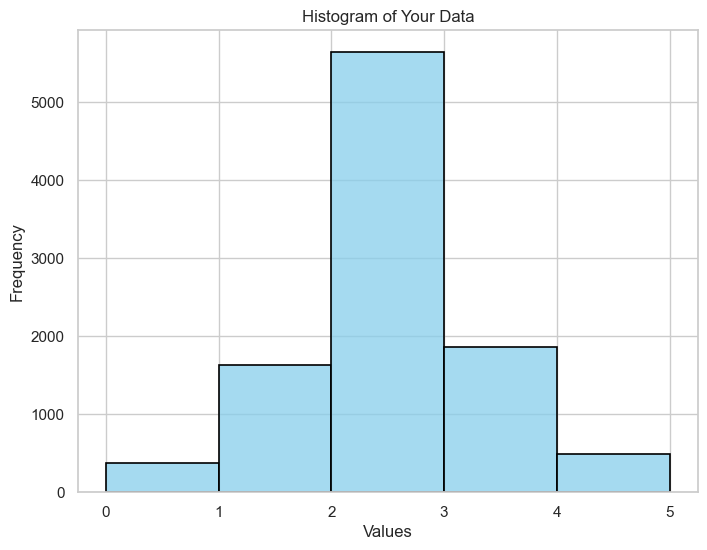

In [48]:

import matplotlib.pyplot as plt
import seaborn as sns

# Your list of numbers
data = df['Sentiment']

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=range(min(data), max(data) + 2), kde=False, color="skyblue", edgecolor="black", linewidth=1.2)

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Your Data')

# Display the plot
plt.show()


Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [53]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Step 1: Convert all text to lowercase
    text = text.lower()

    # Step 2: Remove punctuation marks
    text = re.sub(r'[^\w\s]', '', text)

    # Step 3: Create a list of stop-words
    stop_words = set(stopwords.words('english'))

    # Step 4: Tokenize the text and filter out stop words
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Join the filtered tokens to form the preprocessed text
    text = ' '.join(filtered_tokens)

    return text

# Example usage:
input_text = "Hello, this is an example text! How can I preprocess it? and i is are is there here :) and never and ever"
preprocessed_text = preprocess_text(input_text)
print(preprocessed_text)


hello example text preprocess never ever


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
# TODO: Apply the preprocessing function to the text column

word_list = df['Phrase']

preprocessed_words = [preprocess_text(word) for word in word_list]

# Create a new DataFrame with the preprocessed words
preprocessed_df = pd.DataFrame({'preprocessed_text': preprocessed_words})

# Print the new DataFrame
preprocessed_df


,preprocessed_text
0,series escapades demonstrating adage good goos...
1,series escapades demonstrating adage good goose
2,series
3,
4,series
...,...
9995,plays like corny television production bygone era
9996,plays like corny television
9997,like corny television
9998,corny television


### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

...

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming word_list is a list of phrases
word_list = df['Phrase'].tolist()

# Creating an instance of CountVectorizer
vectorizer = CountVectorizer()

# Applying the vectorizer to the list of phrases
X = vectorizer.fit_transform(word_list)

# Creating a DataFrame from the sparse matrix
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Adding the original phrases to the DataFrame
bow_df['Original_Phrase'] = word_list

# Adding the modified phrases to the DataFrame
preprocessed_phrases = [preprocess_text(phrase) for phrase in word_list]
bow_df['Preprocessed_Phrase'] = preprocessed_phrases

# Adding a column for the count of 1s in each row
bow_df['Count_of_1s'] = bow_df.sum(axis=1)

# Display the DataFrame with BoW features, original phrases, modified phrases, and count of 1s
bow_df



C:\Users\Asus\AppData\Local\Temp\ipykernel_20880\1776759502.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bow_df['Count_of_1s'] = bow_df.sum(axis=1)


,10,100,10th,13,1915,1950s,1970s,1972,1990,2002,...,your,yourself,youth,zaza,zhuangzhuang,zingers,zip,Original_Phrase,Preprocessed_Phrase,Count_of_1s
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,A series of escapades demonstrating the adage ...,series escapades demonstrating adage good goos...,33
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,A series of escapades demonstrating the adage ...,series escapades demonstrating adage good goose,13
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,A series,series,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,A,,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,series,series,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,plays like some corny television production fr...,plays like corny television production bygone era,9
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,plays like some corny television,plays like corny television,5
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,like some corny television,like corny television,4
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,some corny television,corny television,3


### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [69]:
# TODO: Split the dataset into training and testing sets


# TODO: Train a linear regression model


# TODO: Make predictions on the testing set


# TODO: Evaluate the model using mean squared error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'YourTargetColumn' with the actual column name you want to predict
target_column = 'Sentiment'

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Phrase'], df[target_column], test_size=0.2, random_state=42)

# Step 2: Train and fit a linear regression model
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = LinearRegression()
model.fit(X_train_vectorized, y_train)

# Step 3: Evaluate the model's performance on the testing set
y_pred = model.predict(X_test_vectorized)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')



Mean Squared Error (MSE): 0.4154055519266099


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

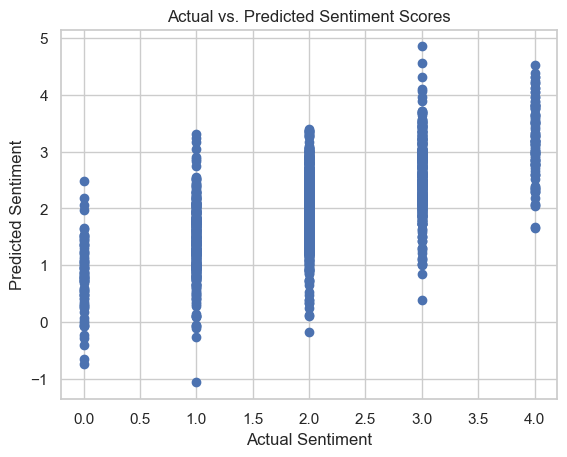

In [70]:
import matplotlib.pyplot as plt

# Step 4: Visualize the actual vs. predicted sentiment scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sentiment')
plt.ylabel('Predicted Sentiment')
plt.title('Actual vs. Predicted Sentiment Scores')
plt.show()


## <font color="red"> Discuss the resulted figure </font>

...

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

Mean Squared Error (MSE): 4.146293816530224e+18


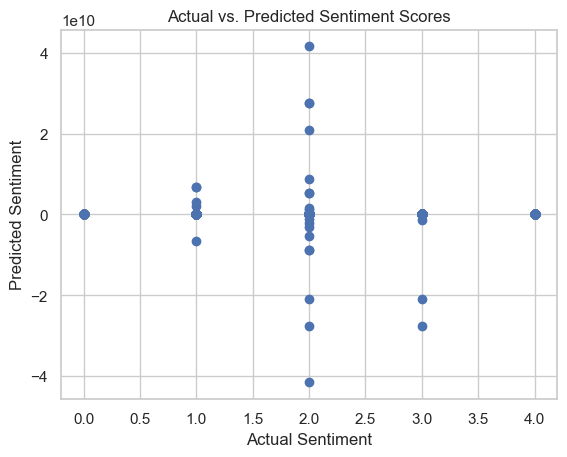

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Replace 'YourTargetColumn' with the actual column name you want to predict
target_column = 'Sentiment'

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Phrase'], df[target_column], test_size=0.2, random_state=42)

# Step 2: Create a basic Bag-of-Words representation from scratch
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Convert the sparse matrix to a dense matrix for visualization
X_train_dense = X_train_vectorized.toarray()
X_test_dense = X_test_vectorized.toarray()

# Step 3: Train and fit a linear regression model
model = LinearRegression()
model.fit(X_train_dense, y_train)

# Step 4: Evaluate the model's performance on the testing set
y_pred = model.predict(X_test_dense)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Step 5: Visualize the actual vs. predicted sentiment scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sentiment')
plt.ylabel('Predicted Sentiment')
plt.title('Actual vs. Predicted Sentiment Scores')
plt.show()
